In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
from keras.callbacks import ModelCheckpoint

In [ ]:
from keras.applications.resnet import ResNet50
from tensorflow.keras.applications.resnet import preprocess_input

In [ ]:
os.chdir('C:\\Users\\rsmvs\\OneDrive\\Desktop')

In [ ]:
train_data =pd.read_csv(r"C:\Users\rsmvs\OneDrive\Desktop\apple_dataset\train.csv")
test_data = pd.read_csv(r"C:\Users\rsmvs\OneDrive\Desktop\apple_dataset\test.csv")

In [ ]:
# Train data
df = pd.read_csv(r'C:\Users\rsmvs\OneDrive\Desktop\apple_dataset\train.csv')
df['label'] = df[['healthy', 'multiple_diseases', 'rust', 'scab']].idxmax(axis=1)
df['filename'] = "C:/Users/rsmvs/OneDrive/Desktop/apple_dataset/images/" + df['image_id'] + '.jpg'

# Test data
test_df = pd.read_csv(r'C:\Users\rsmvs\OneDrive\Desktop\apple_dataset\test.csv')
test_df['filename'] = "C:/Users/rsmvs/OneDrive/Desktop/apple_dataset/images/" + test_df['image_id'] + '.jpg'


In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input) \
  .flow_from_dataframe(dataframe=df, directory=train_path, x_col='filename', y_col='label',
                       target_size=(224,224), classes=['healthy', 'multiple_diseases', 'rust', 'scab'],
                       batch_size=32, class_mode='categorical')

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input) \
  .flow_from_dataframe(dataframe=test_df, directory=train_path, x_col='filename', y_col=None,
                       target_size=(224,224), classes=['healthy', 'multiple_diseases', 'rust', 'scab'],
                       batch_size=32, shuffle=False, class_mode=None)

Found 1821 validated image filenames belonging to 4 classes.


C:\Users\rsmvs\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\legacy\preprocessing\image.py:854: UserWarning: `classes` will be ignored given the class_mode="None"
  warnings.warn(


Found 1821 validated image filenames.


In [ ]:
imgs, labels = next(train_batches)

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-122.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-104.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-89.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-93.68..149.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-112.68..131.32].


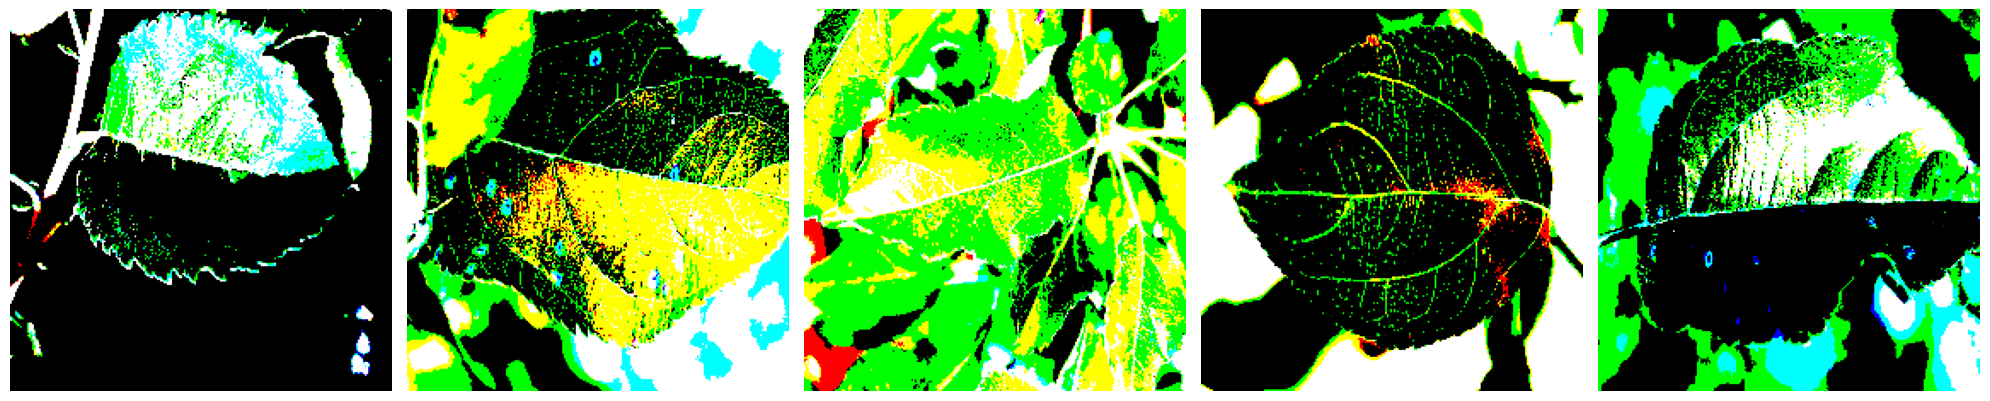

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]


In [ ]:
plotImages(imgs)
print(labels)

In [ ]:
# Step 1: Imports
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import os

# Step 2: Load and preprocess CSV
df = pd.read_csv(r'C:\Users\rsmvs\OneDrive\Desktop\apple_dataset\train.csv')
df['label'] = df[['healthy', 'multiple_diseases', 'rust', 'scab']].idxmax(axis=1)
df['filename'] = "C:/Users/rsmvs/OneDrive/Desktop/apple_dataset/images/" + df['image_id'] + '.jpg'

# Encode class labels
label_list = df['label'].unique().tolist()
label_to_index = {label: idx for idx, label in enumerate(label_list)}
df['label'] = df['label'].map(label_to_index)

# Step 3: Split into train and validation
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

# Step 4: Create data pipeline
def load_dataset(df, batch_size=32):
    file_paths = df['filename'].values
    labels = df['label'].values

    ds = tf.data.Dataset.from_tensor_slices((file_paths, labels))

    def process_path(file_path, label):
        image = tf.io.read_file(file_path)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, [224, 224])
        image = image / 255.0
        label = tf.one_hot(label, depth=len(label_list))
        return image, label

    ds = ds.map(process_path, num_parallel_calls=tf.data.AUTOTUNE)
    return ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)

train_ds = load_dataset(train_df)
val_ds = load_dataset(val_df)

# Step 5: Build the ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(len(label_list), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# Step 6: Set up checkpoint
checkpoint_path = "apple_leaf_resnet.keras"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
callbacks = [checkpoint]

# Step 7: Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=callbacks
)

# Step 8: Load best weights & evaluate
model.load_weights(checkpoint_path)
val_loss, val_acc = model.evaluate(val_ds)
print(f"\n✅ Final Validation Accuracy: {val_acc * 100:.2f}%")


12582912/94765736 ━━━━━━━━━━━━━━━━━━━━ 35:12 26us/step